In [1]:
import pandas as pd                                       # Data manipulation and analysis
import seaborn as sns                                     # Statistical data visualization
import matplotlib.pyplot as plt                           # Plotting library

from sklearn.model_selection import train_test_split, GridSearchCV  # Train/test split and hyperparameter tuning
from sklearn.preprocessing import StandardScaler                     # Feature scaling
from sklearn.linear_model import LogisticRegression                 # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                  # K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier                     # Decision Tree model
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)

from sklearn.metrics import (                                       
    confusion_matrix,             # Confusion matrix evaluation
    classification_report,        # Detailed precision, recall, F1-score
    accuracy_score,               # Accuracy metric
    roc_auc_score,                # ROC-AUC metric
    roc_curve,                    # ROC curve calculation
    auc                           # Area under the curve
)

import pickle                     # Save and load Python objects (like models and scalers)

In [2]:
# Load the preprocessed Raisin dataset from CSV into a DataFrame
df = pd.read_csv("Raisin_preprocessed.csv")   

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,1


In [4]:
x = df.drop('Class', axis=1)   # Features: all columns except 'Class'
y = df['Class']                # Target variable: 'Class' column

In [5]:
scaler = StandardScaler()          # Initialize StandardScaler for feature scaling
x_scaled = scaler.fit_transform(x) # Fit scaler on features and transform them to standard normal (mean=0, std=1)

In [6]:
x_scaled_df = pd.DataFrame(
    x_scaled,        # Use the scaled feature array
    columns=x.columns # Keep original column names
)
x_scaled_df.head()    # Display first 5 rows of the scaled DataFrame

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.018233,0.114718,-0.008905,0.433793,0.014334,1.182348,0.085566
1,-0.321083,-0.205127,-0.223887,0.209859,-0.299351,-0.340924,-0.154109
2,0.109720,0.114908,0.264303,0.166758,0.098939,-1.291766,0.180025
3,-1.123875,-1.285961,-0.942103,-1.248841,-1.138540,-0.024708,-1.222948
4,-0.204609,-0.695392,0.777711,-2.428005,-0.228007,1.879817,-0.340966


In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x_scaled_df, y,       # Features and target
    test_size=0.2,        # 20% of data for testing, 80% for training
    random_state=42       # Set random seed for reproducibility
)

In [8]:
xtrain.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,-0.176356,0.179564,-0.448263,0.887128,-0.148044,-0.543162,0.055787
334,-0.394750,-0.855274,0.606989,-2.428005,-0.401912,0.109801,-0.422169
244,-0.030778,-0.441896,0.723825,-1.655140,-0.078888,1.253911,-0.258866
678,2.380226,1.724596,2.458959,0.084868,2.365533,0.659273,1.991428
306,-0.659657,-0.074881,-1.310724,1.324289,-0.683100,1.744358,-0.551551


In [9]:
ytrain.head()

10     1
334    1
244    1
678    0
306    1
Name: Class, dtype: int64

Applying in logistic regression

In [10]:
logi = LogisticRegression(max_iter=500)  # Initialize Logistic Regression model with 500 max iterations

In [11]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 50],     # List of regularization strengths to try
    'penalty': ['l1', 'l2'],            # Type of regularization
    'solver': ['liblinear']              # Solver to use (compatible with l1 and l2 penalties)
}

In [12]:
grid = GridSearchCV(
    estimator=logi,           # Use Logistic Regression model
    param_grid=param_grid,    # Hyperparameters to search over
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy'        # Evaluate models using accuracy
)

In [13]:
# Fit GridSearchCV on training data to find the best Logistic Regression model
logistic_model = grid.fit(xtrain, ytrain)  

In [14]:
print(f'Train score: {logistic_model.score(xtrain, ytrain)}')  # Print accuracy on training data
print(f'Test score: {logistic_model.score(xtest, ytest)}')    # Print accuracy on testing data

Train score: 0.8694444444444445
Test score: 0.8666666666666667


In [15]:
# Make predictions on the test set using the trained Logistic Regression model
logistic_pred = logistic_model.predict(xtest)  

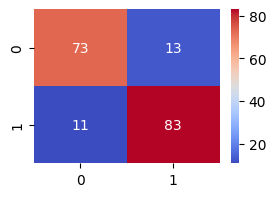

In [16]:
cm_log = confusion_matrix(ytest, logistic_pred)  # Compute confusion matrix for Logistic Regression predictions

plt.figure(figsize=(3, 2))                        # Set figure size
sns.heatmap(cm_log, annot=True, cmap='coolwarm')  # Plot confusion matrix as heatmap with annotations
plt.show()                                        # Display the heatmap

In [17]:
print(f'Classification report:\n{classification_report(ytest, logistic_pred)}')  
# Print precision, recall, F1-score, and support for each class

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        86
           1       0.86      0.88      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [18]:
print(f'Best Parameter: {logistic_model.best_params_}')  # Display the best hyperparameters found by GridSearchCV
print(f'Best Score: {logistic_model.best_score_}')      # Display the best cross-validated score
print(f'Best Index: {logistic_model.best_index_}')      # Display the index of the best parameter set

Best Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8708333333333333
Best Index: 1


Applying in KNN

In [19]:
# Initialize K-Nearest Neighbors classifier with default parameters
knn = KNeighborsClassifier()  

In [20]:
param_grid_k = [  
    {  
        'n_neighbors': range(3, 21, 2),       # Odd numbers of neighbors from 3 to 19  
        'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting  
        'metric': ['minkowski'],             # Distance metric (Minkowski)  
        'p': [1, 2]                          # Parameter for Minkowski (1=Manhattan, 2=Euclidean)  
    },  
    {  
        'n_neighbors': range(3, 21, 2),       # Odd numbers of neighbors from 3 to 19  
        'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting  
        'metric': ['euclidean', 'manhattan'] # Directly specify Euclidean or Manhattan distance  
    }  
]  

In [21]:
grid_knn = GridSearchCV(
    estimator=knn,           # Use K-Nearest Neighbors classifier
    param_grid=param_grid_k, # Hyperparameters to search over
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy'       # Evaluate models using accuracy
)

In [22]:
# Fit GridSearchCV on training data to find the best KNN model
knn_model = grid_knn.fit(xtrain, ytrain)

In [23]:
print(f'Train Score: {knn_model.score(xtrain, ytrain)}')  # Print accuracy on training data
print(f'Test Score: {knn_model.score(xtest, ytest)}')    # Print accuracy on testing data

Train Score: 0.8666666666666667
Test Score: 0.85


In [24]:
# Make predictions on the test set using the trained KNN model
pred_knn = knn_model.predict(xtest)  

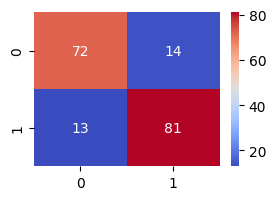

In [25]:
cm_knn = confusion_matrix(ytest, pred_knn)  # Compute confusion matrix for KNN predictions

plt.figure(figsize=(3, 2))                  # Set figure size
sns.heatmap(cm_knn, annot=True, cmap='coolwarm')  # Plot confusion matrix as heatmap with annotations
plt.show()                                  # Display the heatmap

In [26]:
cm_knn

array([[72, 14],
       [13, 81]])

In [27]:
print(f'Classification report:\n{classification_report(ytest, pred_knn)}')  
# Print precision, recall, F1-score, and support for each class for KNN predictions

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        86
           1       0.85      0.86      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [28]:
print(f'Best Parameter: {knn_model.best_params_}')  # Display the best hyperparameters found by GridSearchCV for KNN
print(f'Best Score: {knn_model.best_score_}')      # Display the best cross-validated accuracy score
print(f'Best Index: {knn_model.best_index_}')      # Display the index of the best parameter set

Best Parameter: {'metric': 'minkowski', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}
Best Score: 0.8722222222222223
Best Index: 28


In [29]:
y.value_counts()

Class
1    450
0    450
Name: count, dtype: int64

Applying Decision Tree

In [30]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,                 # Features and target
    random_state=42,      # Set random seed for reproducibility
    test_size=0.2         # 20% of data for testing, 80% for training
)

In [31]:
x_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,80437.000,449.454581,232.325506,0.856043,84460.0,0.674236,1176.305
334,72483.000,334.417609,282.680889,0.590559,74945.0,0.706180,1052.159
244,85739.000,380.370379,288.256159,0.652452,87052.0,0.762152,1094.576
678,173548.625,621.206763,371.054747,0.791796,178669.5,0.733061,1679.075
306,62835.000,421.169338,191.169862,0.891051,64406.0,0.786145,1018.553


In [32]:
y_train.head()

10     1
334    1
244    1
678    0
306    1
Name: Class, dtype: int64

In [33]:
dect = DecisionTreeClassifier(
    random_state=42  # Initialize Decision Tree classifier with a fixed random seed for reproducibility
)

In [34]:
param_grid_d = {
    'criterion': ['gini', 'entropy'],          # Function to measure quality of a split
    'max_depth': [None, 3, 5, 7, 10],         # Maximum depth of the tree
    'min_samples_split': [5, 10, 20],         # Minimum samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],           # Minimum samples required to be at a leaf node
    'splitter': ['best', 'random'],           # Strategy used to choose the split at each node
    'ccp_alpha': [0.0, 0.001, 0.01, 1]       # Complexity parameter for Minimal Cost-Complexity Pruning
}

In [35]:
grid_dect = GridSearchCV(
    estimator=dect,           # Use Decision Tree classifier
    param_grid=param_grid_d,  # Hyperparameters to search over
    n_jobs=-1,                # Use all available CPU cores
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Evaluate models using accuracy
    verbose=1                 # Print progress messages during fitting
)

In [36]:
# Fit GridSearchCV on training data to find the best Decision Tree model
decision_model = grid_dect.fit(x_train, y_train)  

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [37]:
print(f'Train Score: {decision_model.score(x_train, y_train)}')  # Print accuracy on training data
print(f'Test Score: {decision_model.score(x_test, y_test)}')    # Print accuracy on testing data

Train Score: 0.8666666666666667
Test Score: 0.8555555555555555


In [38]:
pred_dect = decision_model.predict(x_test)  # Make predictions on the test set using the trained Decision Tree model

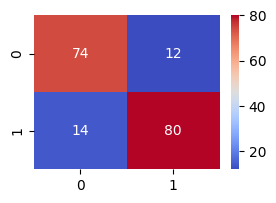

In [39]:
cm_dect = confusion_matrix(y_test, pred_dect)  # Compute confusion matrix for Decision Tree predictions

plt.figure(figsize=(3, 2))                     # Set figure size
sns.heatmap(cm_dect, annot=True, cmap='coolwarm')  # Plot confusion matrix as heatmap with annotations
plt.show()                                     # Display the heatmap

In [40]:
print(f'Classification report:\n{classification_report(y_test, pred_dect)}')  
# Print precision, recall, F1-score, and support for each class for Decision Tree predictions

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [41]:
print(f'Best Parameter: {decision_model.best_params_}')  # Display the best hyperparameters found by GridSearchCV for Decision Tree
print(f'Best Score: {decision_model.best_score_}')      # Display the best cross-validated accuracy score
print(f'Best Index: {decision_model.best_index_}')      # Display the index of the best parameter set

Best Parameter: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Score: 0.8666666666666668
Best Index: 505


Applying Naive bayes

In [42]:
nb_model = {
    "Gaussian_NB": GaussianNB(),        # Gaussian Naive Bayes for continuous numerical features
    "Multinomial_NB": MultinomialNB(),  # Multinomial Naive Bayes for count-based / frequency data
    "Bernoulli_NB": BernoulliNB()       # Bernoulli Naive Bayes for binary (0/1) features
}

In [43]:
for nb_name, nb_models in nb_model.items():          # Iterate through each Naive Bayes model
    print(nb_name)                                   # Print the model name
    
    naive_model = nb_models.fit(x_train, y_train)   # Train the current Naive Bayes model
    print(f'Train Score: {naive_model.score(x_train, y_train)}')  # Show training accuracy
    print(f'Test Score: {naive_model.score(x_test, y_test)}')     # Show testing accuracy
    
    naive_pred = naive_model.predict(x_test)        # Predict class labels for test data
    print(f"Confussion:\n{confusion_matrix(y_test, naive_pred)}") # Display confusion matrix
    print(f'Accuracy: {accuracy_score(y_test, naive_pred)}')      # Calculate overall accuracy
    
    print("------------------------")                 # Separator for better output readability


Gaussian_NB
Train Score: 0.8347222222222223
Test Score: 0.8388888888888889
Confussion:
[[66 20]
 [ 9 85]]
Accuracy: 0.8388888888888889
------------------------
Multinomial_NB
Train Score: 0.7847222222222222
Test Score: 0.8444444444444444
Confussion:
[[67 19]
 [ 9 85]]
Accuracy: 0.8444444444444444
------------------------
Bernoulli_NB
Train Score: 0.5055555555555555
Test Score: 0.4777777777777778
Confussion:
[[86  0]
 [94  0]]
Accuracy: 0.4777777777777778
------------------------



MultinomialNB works better than other so final applying MultinomialNB

In [ ]:
ml_naiv = MultinomialNB()                              # Initialize Multinomial Naive Bayes model
ml_naive_model = ml_naiv.fit(x_train, y_train)        # Train the model on training data

print(f'Train Score: {ml_naive_model.score(x_train, y_train)}')  # Training accuracy
print(f'Test Score: {ml_naive_model.score(x_test, y_test)}')     # Testing accuracy

ml_naive_pred = ml_naive_model.predict(x_test)        # Predict class labels for test data

print(f'Confusion matrix: {confusion_matrix(y_test, ml_naive_pred)}')  # Show confusion matrix
print(f'Classification Report:\n{classification_report(y_test, ml_naive_pred)}')  # Detailed performance report
print(f'Accuracy: {accuracy_score(y_test, ml_naive_pred)}')           # Overall accuracy

Train Score: 0.7847222222222222
Test Score: 0.8444444444444444
Confusion matrix: [[67 19]
 [ 9 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        86
           1       0.82      0.90      0.86        94

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180

Accuracy: 0.8444444444444444


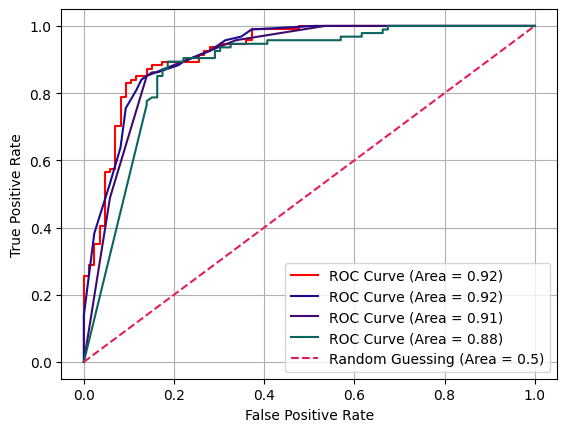

In [ ]:
# Logistic Regression ROC
logistic_pred_proba = logistic_model.predict_proba(xtest)[:, 1]   # Probabilities for positive class
fpr1, tpr1, _ = roc_curve(ytest, logistic_pred_proba)              # Compute FPR and TPR
roc_auc1 = roc_auc_score(ytest, logistic_pred_proba)               # Compute ROC AUC score

# KNN ROC
knn_pred_proba = knn_model.predict_proba(xtest)[:, 1]              # Probabilities for positive class
fpr2, tpr2, _ = roc_curve(ytest, knn_pred_proba)                  # Compute FPR and TPR
roc_auc2 = roc_auc_score(ytest, knn_pred_proba)                   # Compute ROC AUC score

# Decision Tree ROC
decision_pred_proba = decision_model.predict_proba(x_test)[:, 1]   # Probabilities for positive class
fpr3, tpr3, _ = roc_curve(y_test, decision_pred_proba)             # Compute FPR and TPR
roc_auc3 = roc_auc_score(y_test, decision_pred_proba)              # Compute ROC AUC score

# MLNaive Bayes ROC 
ml_naive_bayes_proba = ml_naive_model.predict_proba(x_test)[:, 1]  # Probabilities for positive class
fpr4, tpr4, _ = roc_curve(y_test, ml_naive_bayes_proba)            # Compute FPR and TPR
roc_auc4 = roc_auc_score(y_test, ml_naive_bayes_proba)             # Compute ROC AUC score

# Plot ROC curves
plt.plot(fpr1, tpr1, color='red', label=f'ROC Curve (Area = {roc_auc1:.2f})')      # Logistic ROC
plt.plot(fpr2, tpr2, color="#1A0C92", label=f'ROC Curve (Area = {roc_auc2:.2f})')  # KNN ROC
plt.plot(fpr3, tpr3, color="#3D0B6E", label=f'ROC Curve (Area = {roc_auc3:.2f})')  # Decision Tree ROC
plt.plot(fpr4, tpr4, color="#0B645D", label=f'ROC Curve (Area = {roc_auc4:.2f})')  # Ml Naive Bayes ROC

plt.plot([0, 1], [0, 1], color="#E41D59", linestyle="--", label='Random Guessing (Area = 0.5)')  # Baseline

plt.xlabel("False Positive Rate")     # X-axis label
plt.ylabel("True Positive Rate")      # Y-axis label
plt.legend(loc='lower right')         # Show legend
plt.grid(True)                        # Enable grid
plt.show()                            # Display ROC curves

In [45]:
# Save the fitted StandardScaler to a file for later use
pickle.dump(scaler, open("scaler.pkl", "wb"))  

In [46]:
#Save the trained KNN model to a file for later use
pickle.dump(knn_model, open("knn_raisin.pkl", "wb")) 